# Customer Segmentation using RFM Analysis
E-commerce database that lists purchases made by 4000 customers over a period of one year (from 2010/12/01 to 2011/12/09). Based on this analysis, I develop a model that allows to anticipate the purchases that will be made by a new customer, during the following year and this, from its first purchase

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Task 1

## Data Preparation

In [3]:
df = pd.read_csv('data.csv', encoding='latin-1') 

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 541909, dtype: bool

In [10]:
df.shape

(541909, 8)

In [11]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


# Data Cleaning (_Remove nulls,Handle outliers_)

In [12]:
df = df.dropna()

In [13]:
df.shape

(406829, 8)

In [14]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [15]:
df=df[df['Quantity']>0]

In [16]:
Q1=df['UnitPrice'].quantile(0.25)
Q3=df['UnitPrice'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
Upper_bound=Q3+1.5*IQR

In [17]:
df=df[(df['UnitPrice']>=lower_bound ) & (df['UnitPrice']<=Upper_bound)]

In [18]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 363568 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    363568 non-null  object 
 1   StockCode    363568 non-null  object 
 2   Description  363568 non-null  object 
 3   Quantity     363568 non-null  int64  
 4   InvoiceDate  363568 non-null  object 
 5   UnitPrice    363568 non-null  float64
 6   CustomerID   363568 non-null  float64
 7   Country      363568 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 25.0+ MB
None
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLL

In [19]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


# Task 2

## RFM Calculation

In [20]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Recency   
 Days since last purchase

In [21]:
df_recency = df.groupby(by='CustomerID', as_index=False)['InvoiceDate'].max()
df_recency.columns = ['CustomerID', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)
print(df_recency.head())

   CustomerID    LastPurchaseDate  Recency
0     12346.0 2011-01-18 10:01:00      325
1     12347.0 2011-12-07 15:52:00        1
2     12348.0 2011-09-25 13:13:00       74
3     12349.0 2011-11-21 09:51:00       18
4     12350.0 2011-02-02 16:01:00      309


# Frequency
Total number of purchases

In [22]:
frequency_df = df.drop_duplicates().groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID', 'Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,175
2,12348.0,27
3,12349.0,60
4,12350.0,16


# Monetory
Total amount spent by each customer

In [23]:
df['Total'] = df['UnitPrice'] * df['Quantity']
monetary_df = df.groupby(by='CustomerID', as_index=False)['Total'].sum()
monetary_df.columns = ['CustomerID', 'Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,3981.15
2,12348.0,1437.24
3,12349.0,1089.15
4,12350.0,294.40


# Merging RFM & Classify customers into segments

In [24]:
rfm = df_recency.merge(frequency_df, on='CustomerID')
rfm = rfm.merge(monetary_df, on='CustomerID')

rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])  # Recency: Lower is better
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])  # Frequency: Higher is better
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])  # Monetary: Higher is better

rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

def classify_customer(row):
    if row['RFM_Score'] == '444':
        return 'Best Customers'  # High spenders who buy frequently and recently
    elif row['RFM_Score'] == '111':
        return 'Churned Customers'  # Least engaged customers
    elif row['R_Score'] == '1':
        return 'At-Risk Customers'  # Recently stopped buying
    elif row['F_Score'] == '4' and row['M_Score'] == '4':
        return 'Loyal Customers'  # Frequent and high spending
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(classify_customer, axis=1)
print(rfm.head())


   CustomerID    LastPurchaseDate  Recency  Frequency  Monetary R_Score  \
0     12346.0 2011-01-18 10:01:00      325          1  77183.60       1   
1     12347.0 2011-12-07 15:52:00        1        175   3981.15       4   
2     12348.0 2011-09-25 13:13:00       74         27   1437.24       2   
3     12349.0 2011-11-21 09:51:00       18         60   1089.15       3   
4     12350.0 2011-02-02 16:01:00      309         16    294.40       1   

  F_Score M_Score RFM_Score         Segment  
0       1       4       114          Others  
1       4       4       444  Best Customers  
2       2       3       223          Others  
3       3       3       333          Others  
4       2       2       122          Others  


In [25]:
rfm.tail()

,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
4303,18280.0,2011-03-07 09:52:00,277,8,137.00,1,1,1,111,Churned Customers
4304,18281.0,2011-06-12 10:53:00,180,5,46.92,1,1,1,111,Churned Customers
4305,18282.0,2011-12-02 11:43:00,7,9,127.05,4,1,1,411,Others
4306,18283.0,2011-12-06 12:02:00,3,717,2051.98,4,4,4,444,Best Customers
4307,18287.0,2011-10-28 09:29:00,42,69,1803.28,3,3,4,334,Others


# Task 3
##  Visualization

#PieChart

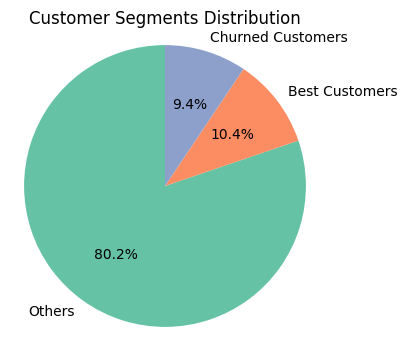

In [26]:
segment_counts = rfm['Segment'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', n_colors=len(segment_counts)))
plt.title('Customer Segments Distribution')
plt.axis('equal') 
plt.show()

# Scatter Plot

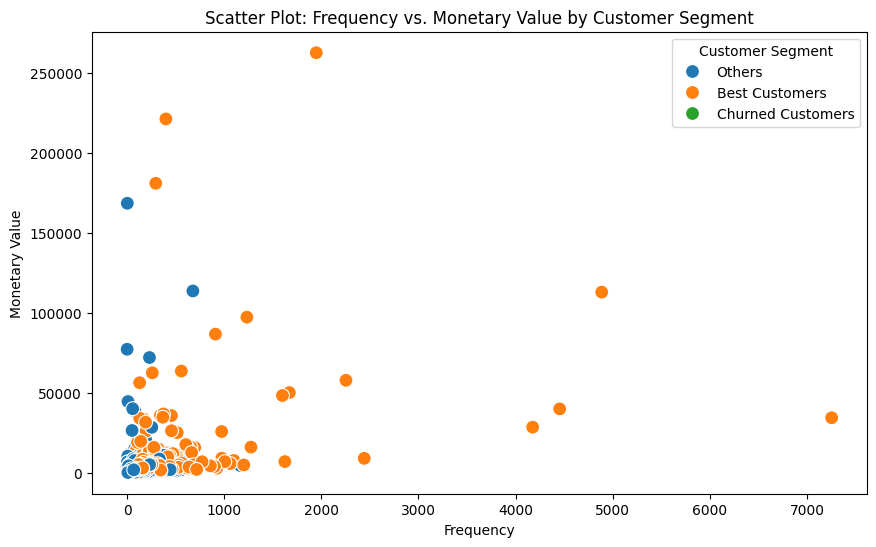

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Segment', palette='tab10', s=100)
plt.title('Scatter Plot: Frequency vs. Monetary Value by Customer Segment')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.legend(title='Customer Segment')
plt.show()

# Heat Map

C:\Users\Mathan Br\AppData\Local\Temp\ipykernel_10816\3321704865.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  rfm_pivot = rfm.pivot_table(index='R_Score', columns='F_Score', values='Monetary', aggfunc='mean')


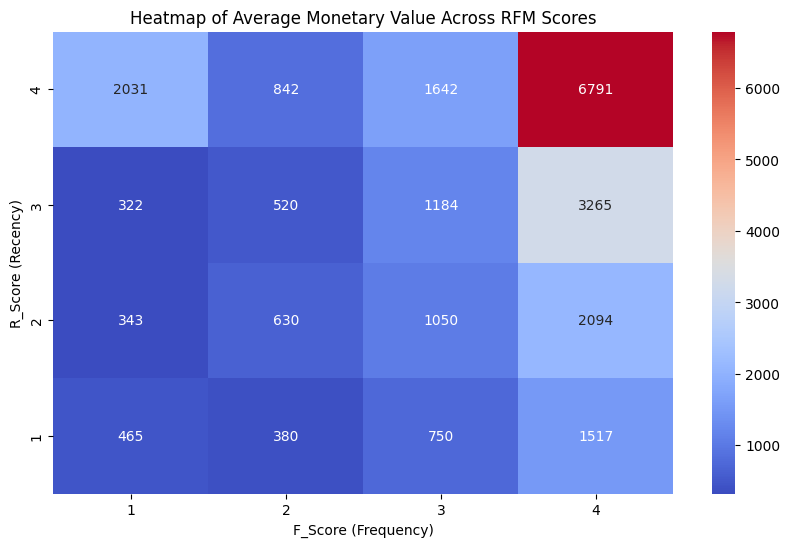

In [28]:
plt.figure(figsize=(10,6))
rfm_pivot = rfm.pivot_table(index='R_Score', columns='F_Score', values='Monetary', aggfunc='mean')
sns.heatmap(rfm_pivot, annot=True, fmt='.0f', cmap='coolwarm')
plt.title('Heatmap of Average Monetary Value Across RFM Scores')
plt.xlabel('F_Score (Frequency)')
plt.ylabel('R_Score (Recency)')
plt.show()

# Histogram

C:\Users\Mathan Br\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


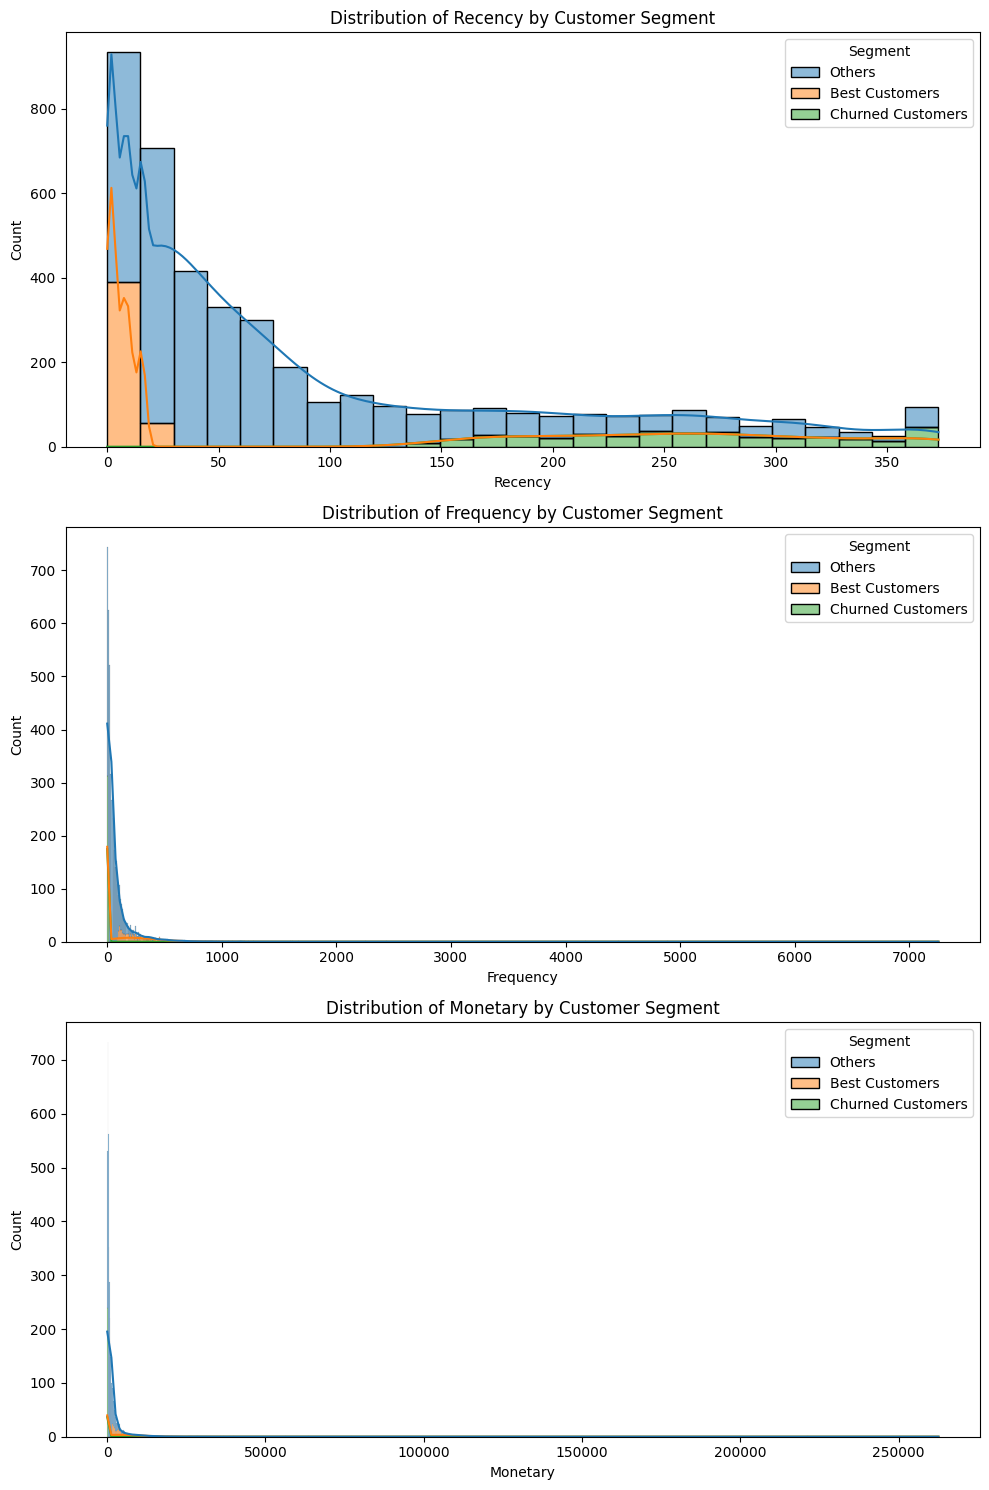

In [29]:

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

sns.histplot(data=rfm, x='Recency', hue='Segment', multiple='stack', kde=True, palette='tab10', ax=axes[0])
axes[0].set_title('Distribution of Recency by Customer Segment')

sns.histplot(data=rfm, x='Frequency', hue='Segment', multiple='stack', kde=True, palette='tab10', ax=axes[1])
axes[1].set_title('Distribution of Frequency by Customer Segment')

sns.histplot(data=rfm, x='Monetary', hue='Segment', multiple='stack', kde=True, palette='tab10', ax=axes[2])
axes[2].set_title('Distribution of Monetary by Customer Segment')

plt.tight_layout()
plt.show()


# Exporting The Dataset

In [30]:
rfm.to_csv('RFM_Segments.csv',index=False)

In [31]:
df.to_csv('Cleaned_dataset.csv',index=False)